# Chargement des données

In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    dbname="meteo_db",
    user="airflow",
    password="tsanta",
    host="localhost",
    port="5432"
)

df = pd.read_sql("SELECT * FROM city_weather_summary JOIN dim_city USING(city_id)", conn)
conn.close()
df.head()


/tmp/ipykernel_8671/654700364.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM city_weather_summary JOIN dim_city USING(city_id)", conn)


,city_id,id,month,month_name,season,year,avg_temp,avg_precipitation,avg_humidity,avg_wind,avg_sun_hours,avg_score,source,city_name,country,continent,latitude,longitude
0,40,1,6,June,Summer,2024,19.29,5.07,84.21,4.78,10.30,4.73,historical,Bogota,None,None,4.711,-74.0721
1,40,2,7,July,Summer,2024,18.50,2.10,81.19,6.79,10.52,5.16,historical,Bogota,None,None,4.711,-74.0721
2,40,3,8,August,Summer,2024,19.77,1.06,77.42,6.98,11.04,5.74,historical,Bogota,None,None,4.711,-74.0721
3,40,4,9,September,Autumn,2024,20.67,1.16,74.97,7.25,10.63,5.67,historical,Bogota,None,None,4.711,-74.0721
4,40,5,10,October,Autumn,2024,20.72,3.77,80.34,5.07,10.40,5.23,historical,Bogota,None,None,4.711,-74.0721


# Vue d’ensemble des données

In [3]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_id            135 non-null    int64  
 1   id                 135 non-null    int64  
 2   month              135 non-null    int64  
 3   month_name         135 non-null    object 
 4   season             135 non-null    object 
 5   year               135 non-null    int64  
 6   avg_temp           135 non-null    float64
 7   avg_precipitation  135 non-null    float64
 8   avg_humidity       135 non-null    float64
 9   avg_wind           135 non-null    float64
 10  avg_sun_hours      135 non-null    float64
 11  avg_score          135 non-null    float64
 12  source             135 non-null    object 
 13  city_name          135 non-null    object 
 14  country            0 non-null      object 
 15  continent          0 non-null      object 
 16  latitude           135 non

city_id                0
id                     0
month                  0
month_name             0
season                 0
year                   0
avg_temp               0
avg_precipitation      0
avg_humidity           0
avg_wind               0
avg_sun_hours          0
avg_score              0
source                 0
city_name              0
country              135
continent            135
latitude               0
longitude              0
dtype: int64

# analyse univariée (variables seules)

Text(0.5, 1.0, 'Score météo par saison')

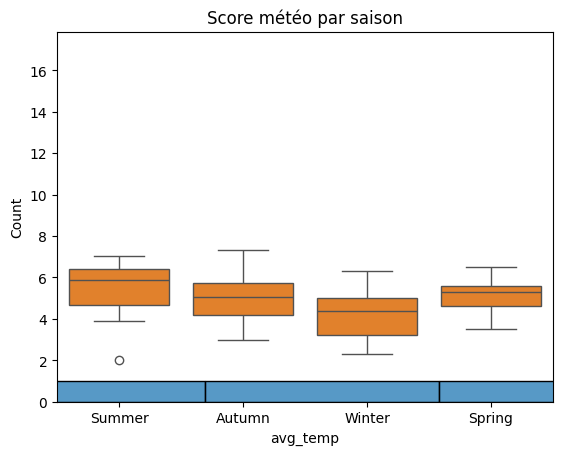

In [4]:

sns.histplot(df['avg_temp'], bins=20)
plt.title("Distribution des températures moyennes")

sns.boxplot(x='season', y='avg_score', data=df)
plt.title("Score météo par saison")


# analyse bivariée ( entres deux colonnes)

<Axes: >

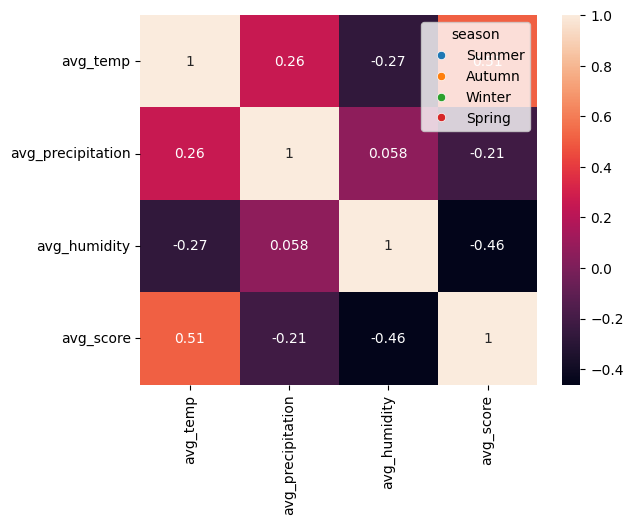

In [5]:
sns.scatterplot(data=df, x='avg_temp', y='avg_score', hue='season')
sns.heatmap(df[['avg_temp','avg_precipitation','avg_humidity','avg_score']].corr(), annot=True)


# classement des villes

In [6]:
top = df[df['season'] == 'Summer'].sort_values(by='avg_score', ascending=False).head(10)
print(top[['city_name', 'avg_score', 'season']])


          city_name  avg_score  season
44             Kiev       7.03  Summer
16     Antananarivo       6.90  Summer
15     Antananarivo       6.87  Summer
55             Kiev       6.67  Summer
83           Munich       6.67  Summer
54             Kiev       6.57  Summer
113  Rio de Janeiro       6.55  Summer
112  Rio de Janeiro       6.53  Summer
42             Kiev       6.50  Summer
58            Paris       6.48  Summer


# visualisation mensuelle

Text(0.5, 1.0, 'Score météo de Paris par mois')

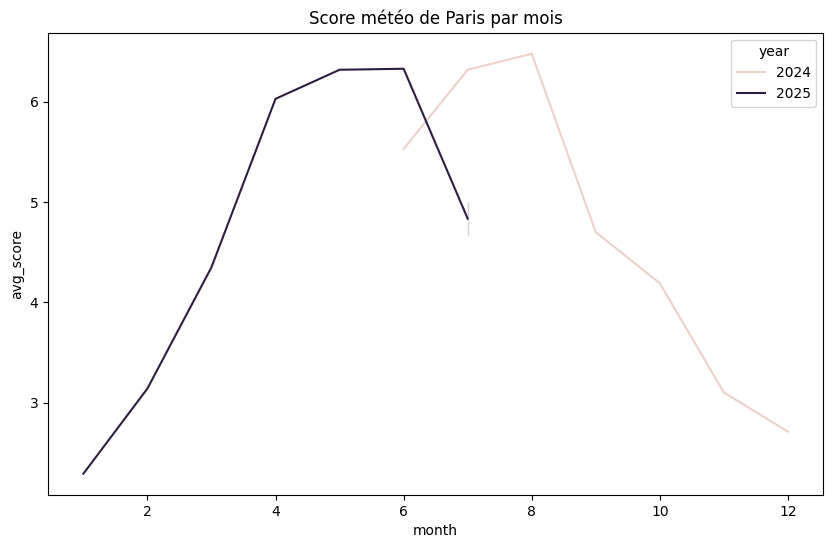

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['city_name']=='Paris'], x='month', y='avg_score', hue='year')
plt.title("Score météo de Paris par mois")
